# Análisis Exploratorio de Datos del Modelo Final

In [ ]:
# Imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')

import statsmodels.api as sm

#cargamos los datos de entrada
df = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train.csv",index_col=0,sep=",")
#veamos cuantas dimensiones y registros contiene

## Descripción básica del dataset

In [121]:
df.head(5)

,hors,ws,wd,anno,mes,dia,horsObs,wp1
4,5,2.93,120.13,2009,7,1,0,0.035
5,6,2.96,115.79,2009,7,1,0,0.005
6,7,2.81,106.71,2009,7,1,0,0.000
7,8,2.73,95.39,2009,7,1,0,0.000
8,9,2.87,88.50,2009,7,1,0,0.010


## Descripción filas y columnas

In [122]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (96096, 8)
Nombre columnas: Index(['hors', 'ws', 'wd', 'anno', 'mes', 'dia', 'horsObs', 'wp1'], dtype='object')


## Columnas, tipo de datos y nulos

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96096 entries, 4 to 104831
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   hors     96096 non-null  int64  
 1   ws       96096 non-null  float64
 2   wd       96096 non-null  float64
 3   anno     96096 non-null  int64  
 4   mes      96096 non-null  int64  
 5   dia      96096 non-null  int64  
 6   horsObs  96096 non-null  int64  
 7   wp1      96096 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 6.6 MB


In [124]:
len(df)

96096

In [125]:
#def reescalar(num):
#    num_str = num*30
#    return int(num_str)

In [126]:
# Actualizar date
#df['wp1_esc'] = df['wp1'].apply(reescalar)


In [127]:
#df

In [128]:
#df_plot = df

In [234]:

# ===========IZQUIERDO ========

df_borrar = df[(df['ws']<0.5) & (df['wp1']>0.2)] 
df = df.drop(df_borrar.index) 

df_borrar = df[(df['ws']<1) & (df['wp1']>0.25)] 
df = df.drop(df_borrar.index) 

df_borrar = df[(df['ws']<1.5) & (df['wp1']>0.5)] 
df = df.drop(df_borrar.index) 

df_borrar = df[(df['ws']<2) & (df['wp1']>0.6)] 
df = df.drop(df_borrar.index) 

df_borrar = df[(df['ws']<2.5) & (df['wp1']>0.65)] 
df = df.drop(df_borrar.index) 

df_borrar = df[(df['ws']<3) & (df['wp1']>0.8)] 
df = df.drop(df_borrar.index) 

df_borrar = df[(df['ws']<3.5) & (df['wp1']>0.85)] 
df = df.drop(df_borrar.index) 

df_borrar = df[(df['ws']<4) & (df['wp1']>0.9)] 
df = df.drop(df_borrar.index) 


# =========== DERECHO ========


df_borrar = df[(df['ws']>8) & (df['wp1']<0.05)] 
df = df.drop(df_borrar.index) 

df_borrar = df[(df['ws']>8.5) & (df['wp1']<0.2)] 
df = df.drop(df_borrar.index) 

df_borrar = df[(df['ws']>9) & (df['wp1']<0.4)] 
df = df.drop(df_borrar.index) 

df_borrar = df[(df['ws']>9.5) & (df['wp1']<0.5)] 
df = df.drop(df_borrar.index) 

df_borrar = df[(df['ws']>10) & (df['wp1']<0.6)] 
df = df.drop(df_borrar.index) 

df_borrar = df[(df['ws']>10.5) & (df['wp1']<0.65)] 
df = df.drop(df_borrar.index) 

df_borrar = df[(df['ws']>11) & (df['wp1']<0.7)] 
df = df.drop(df_borrar.index) 

df_borrar = df[(df['ws']>11.5) & (df['wp1']<0.75)] 
df = df.drop(df_borrar.index) 

df_borrar = df[(df['ws']>12) & (df['wp1']<0.8)] 
df = df.drop(df_borrar.index) 


#df_borrar = df[(df['ws']<0.5) & (df['wp1']>0.03)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']<0.8) & (df['wp1']>0.1)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']<1) & (df['wp1']>0.15)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']<1.5) & (df['wp1']>0.25)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']<2) & (df['wp1']>0.4)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']<2.5) & (df['wp1']>0.5)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']<3) & (df['wp1']>0.6)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']<3.5) & (df['wp1']>0.65)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']<4) & (df['wp1'] >0.75)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']<4.5) & (df['wp1'] >0.8)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']<5) & (df['wp1'] >0.9)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']<5.5) & (df['wp1'] >0.93)] 
#df = df.drop(df_borrar.index) 

# ===========DERECHO==============


#df_borrar = df[(df['ws']>7) & (df['wp1']<0.1)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']>7.5) & (df['wp1']<0.2)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']>8) & (df['wp1']<0.3)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']>8.5) & (df['wp1']<0.45)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']>9) & (df['wp1']<0.55)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']>9.5) & (df['wp1']<0.65)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']>10) & (df['wp1']<0.65)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']>11) & (df['wp1']<0.7)] 
#df = df.drop(df_borrar.index)

#df_borrar = df[(df['ws']>11.5) & (df['wp1']<0.75)] 
#df = df.drop(df_borrar.index) 

#df_borrar = df[(df['ws']>12) & (df['wp1']<0.8)] 
#df = df.drop(df_borrar.index)

In [235]:
#df_plot = df_plot.drop_duplicates() 
df_plot =df
df_plot


#df = df[(df['hors'] == 10)  ]
#df_plot = df



,hors,ws,wd,anno,mes,dia,horsObs,wp1
4,5,2.93,120.13,2009,7,1,0,0.035
5,6,2.96,115.79,2009,7,1,0,0.005
6,7,2.81,106.71,2009,7,1,0,0.000
7,8,2.73,95.39,2009,7,1,0,0.000
8,9,2.87,88.50,2009,7,1,0,0.010
...,...,...,...,...,...,...,...,...
104827,44,2.67,66.14,2012,6,26,12,0.226
104828,45,2.57,55.39,2012,6,26,12,0.226
104829,46,2.29,45.42,2012,6,26,12,0.226
104830,47,1.91,34.05,2012,6,26,12,0.226


In [236]:
len(df_plot)

95111

In [237]:
data_plot = df_plot.values
ws = data_plot[:,1]
wp1 = data_plot[:,7]

In [238]:
ws

array([2.93, 2.96, 2.81, ..., 2.29, 1.91, 1.58])

In [239]:
wp1

array([0.035, 0.005, 0.   , ..., 0.226, 0.226, 0.226])

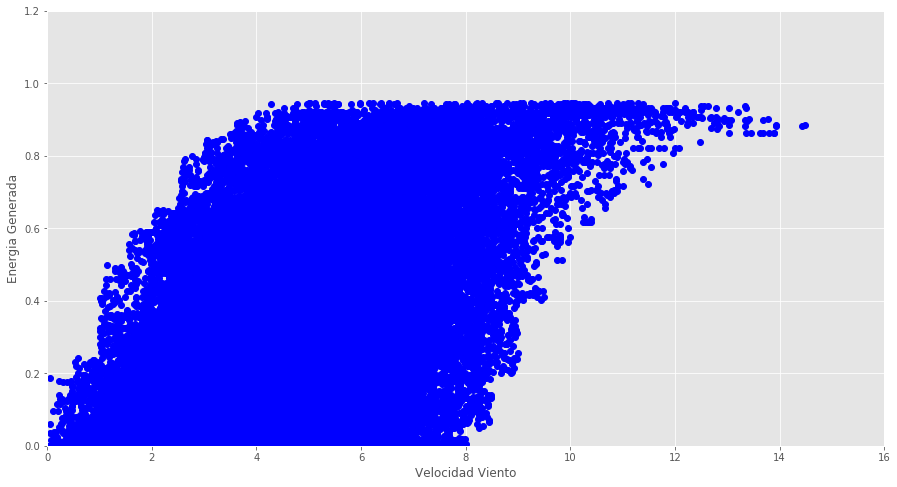

In [270]:
plt.plot(ws, wp1, "bo")
plt.xlabel("Velocidad Viento")
plt.ylabel("Energia Generada")
plt.axis([0, 16, 0, 1.2, ])
#plt.legend()
plt.show()

## Descripción estadística de los datos numéricos

In [241]:
df.describe()

,hors,ws,wd,anno,mes,dia,horsObs,wp1
count,95111.000000,95111.000000,95111.000000,95111.000000,95111.000000,95111.000000,95111.000000,95111.000000
mean,26.471249,4.033526,144.672144,2010.486579,6.538350,15.682466,5.993628,0.251616
std,12.683394,1.804828,93.259631,0.955473,3.452905,8.781993,6.000028,0.236079
min,5.000000,0.010000,0.020000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,15.000000,2.750941,72.851351,2010.000000,4.000000,8.000000,0.000000,0.060000
50%,26.000000,3.680000,122.600000,2010.000000,7.000000,16.000000,0.000000,0.180000
75%,37.000000,5.040000,196.545000,2011.000000,10.000000,23.000000,12.000000,0.376000
max,48.000000,14.490000,359.990000,2012.000000,12.000000,31.000000,12.000000,0.947000


## Correlación entre variables

In [259]:
df.corr()

,hors,ws,wd,anno,mes,dia,horsObs,wp1
hors,1.000000e+00,-0.009213,-0.002939,0.000000,-4.550212e-20,-1.495096e-17,0.000000e+00,0.013367
ws,-9.212510e-03,1.000000,-0.164146,-0.014030,-1.204947e-02,1.520077e-02,-3.033993e-02,0.568161
wd,-2.938547e-03,-0.164146,1.000000,-0.020134,-2.858808e-02,4.729461e-02,2.933036e-03,-0.169101
anno,0.000000e+00,-0.014030,-0.020134,1.000000,-4.555529e-01,-1.323925e-02,0.000000e+00,0.101105
mes,-4.550212e-20,-0.012049,-0.028588,-0.455553,1.000000e+00,1.091359e-02,3.655866e-19,-0.071964
dia,-1.495096e-17,0.015201,0.047295,-0.013239,1.091359e-02,1.000000e+00,1.891352e-18,0.003222
horsObs,0.000000e+00,-0.030340,0.002933,0.000000,3.655866e-19,1.891352e-18,1.000000e+00,-0.007128
wp1,1.336657e-02,0.568161,-0.169101,0.101105,-7.196366e-02,3.221901e-03,-7.127735e-03,1.000000


In [260]:
df.drop(['dia','horsObs'], axis=1, inplace=True)
df.head(5)

,hors,ws,wd,anno,mes,wp1
4,5,2.93,120.13,2009,7,0.035
5,6,2.96,115.79,2009,7,0.005
6,7,2.81,106.71,2009,7,0.000
7,8,2.73,95.39,2009,7,0.000
8,9,2.87,88.50,2009,7,0.010


In [261]:
df.corr()

,hors,ws,wd,anno,mes,wp1
hors,1.000000e+00,-0.009213,-0.002939,0.000000,-4.550212e-20,0.013367
ws,-9.212510e-03,1.000000,-0.164146,-0.014030,-1.204947e-02,0.568161
wd,-2.938547e-03,-0.164146,1.000000,-0.020134,-2.858808e-02,-0.169101
anno,0.000000e+00,-0.014030,-0.020134,1.000000,-4.555529e-01,0.101105
mes,-4.550212e-20,-0.012049,-0.028588,-0.455553,1.000000e+00,-0.071964
wp1,1.336657e-02,0.568161,-0.169101,0.101105,-7.196366e-02,1.000000


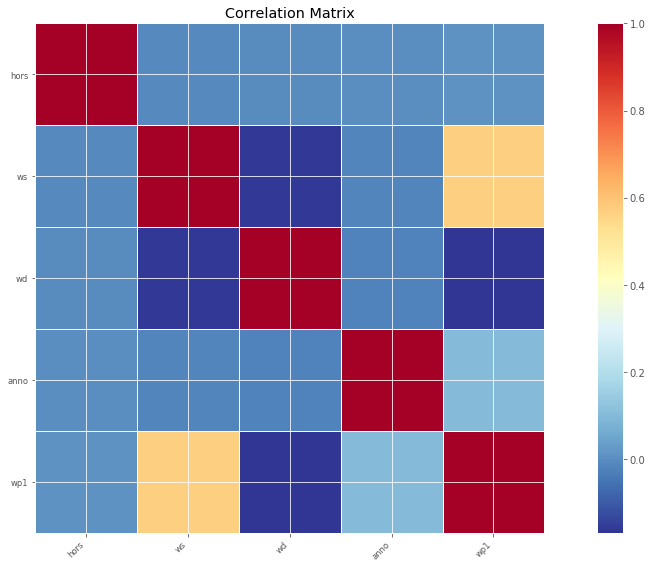

In [262]:
corr = df.set_index("mes").corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [263]:
nan_rows = df[df['wp1'].isnull()] 
nan_rows

,hors,ws,wd,anno,mes,wp1


In [264]:
#df2=df
#df2.drop(['anno','mes'], axis=1, inplace=True)
df.head()

,hors,ws,wd,anno,mes,wp1
4,5,2.93,120.13,2009,7,0.035
5,6,2.96,115.79,2009,7,0.005
6,7,2.81,106.71,2009,7,0.000
7,8,2.73,95.39,2009,7,0.000
8,9,2.87,88.50,2009,7,0.010


In [265]:
df_5a12  = df[(df['hors'] <= 12)]
df_13a24 = df[(df['hors'] > 12) & (df['hors'] <= 24)]
df_25a48 = df[(df['hors'] > 24)]

#df.drop(['hors'], axis=1, inplace=True)
#df.drop(['hors'], axis=1, inplace=True)

In [266]:

df.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin.csv')
df_5a12.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_5a12.csv')
df_13a24.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_13a24.csv')
df_25a48.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_25a48.csv')


In [550]:
#df.wp1.plot().get_figure()